# Segment foreground objects from the background

In [1]:
import cv2
import mahotas
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread("image4.jpeg")
(h,w,_)=image.shape
image= cv2.resize(image, [w//2,h//2])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [3]:
canny = cv2.Canny(blurred, 20, 150)

In [4]:
(cnts,_) = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
contr=image.copy()
cv2.drawContours(contr, cnts, -1, (0, 255, 0), 2)

array([[[ 88, 104, 117],
        [ 92, 108, 121],
        [ 94, 110, 123],
        ...,
        [114, 141, 162],
        [118, 145, 166],
        [119, 146, 167]],

       [[102, 118, 131],
        [104, 120, 133],
        [104, 120, 133],
        ...,
        [118, 145, 166],
        [115, 142, 163],
        [114, 141, 162]],

       [[109, 125, 138],
        [111, 127, 140],
        [111, 127, 140],
        ...,
        [116, 143, 164],
        [117, 144, 165],
        [119, 146, 167]],

       ...,

       [[ 98, 114, 127],
        [ 91, 107, 120],
        [ 93, 109, 122],
        ...,
        [110, 130, 147],
        [108, 128, 145],
        [104, 124, 141]],

       [[ 93, 109, 122],
        [ 92, 108, 121],
        [ 99, 115, 128],
        ...,
        [108, 128, 145],
        [108, 128, 145],
        [106, 126, 143]],

       [[111, 127, 140],
        [108, 124, 137],
        [109, 125, 138],
        ...,
        [ 95, 115, 132],
        [100, 120, 137],
        [105, 125, 142]]

### OTSU

In [6]:
T = mahotas.thresholding.otsu(contr)
thresh = gray.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=1)

In [8]:
foreground = cv2.bitwise_and(image, image, mask = dilate)

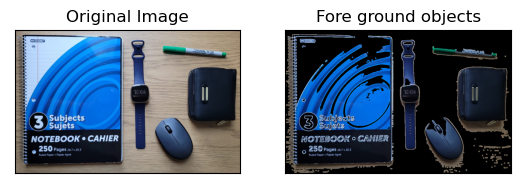

In [9]:
plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB), cmap = plt.cm.gray)
plt.title('Fore ground objects'), plt.xticks([]), plt.yticks([])
plt.show()

### Manual Threshold

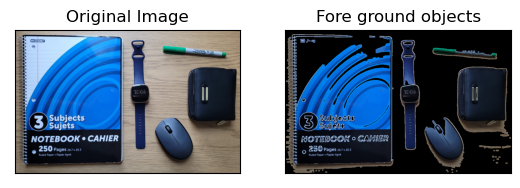

In [10]:
(T2, thresh2) = cv2.threshold(blurred, 99, 255, cv2.THRESH_BINARY)
(T2, threshInv2) = cv2.threshold(blurred, 105, 255, cv2.THRESH_BINARY_INV)
kernel_t = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate_t = cv2.dilate(threshInv2, kernel_t, iterations=1)

foreground2 = cv2.bitwise_and(image, image, mask = dilate_t)

plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(foreground2, cv2.COLOR_BGR2RGB), cmap = plt.cm.gray)
plt.title('Fore ground objects'), plt.xticks([]), plt.yticks([])
plt.show()

### Adaptive Gaussian Threshold

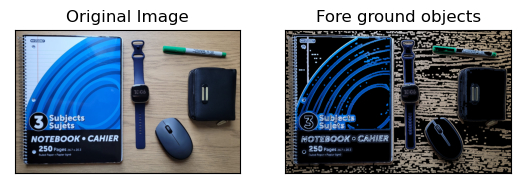

In [11]:
gaussianthresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               13, 
                               5
)
kernel_g = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate_g = cv2.dilate(gaussianthresh, kernel, iterations=1)
foreground3 = cv2.bitwise_and(image, image, mask = dilate_g)
plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(foreground3, cv2.COLOR_BGR2RGB), cmap = plt.cm.gray)
plt.title('Fore ground objects'), plt.xticks([]), plt.yticks([])
plt.show()

### RC 

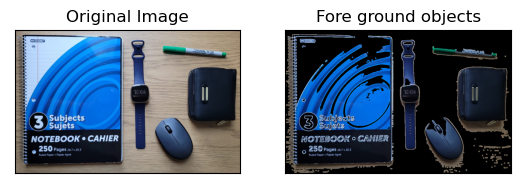

In [14]:
T4 = mahotas.thresholding.rc(contr)
thresh4 = gray.copy()
thresh4[thresh4 > T4] = 255
thresh4[thresh4 < 255] = 0
thresh4 = cv2.bitwise_not(thresh4)
kernel_rc = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate_rc = cv2.dilate(thresh4, kernel_rc, iterations=1)
foreground4 = cv2.bitwise_and(image, image, mask = dilate_rc)
plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(foreground4, cv2.COLOR_BGR2RGB), cmap = plt.cm.gray)
plt.title('Fore ground objects'), plt.xticks([]), plt.yticks([])
plt.show()

### Comparision

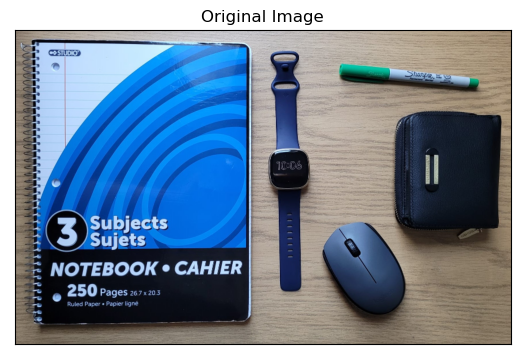

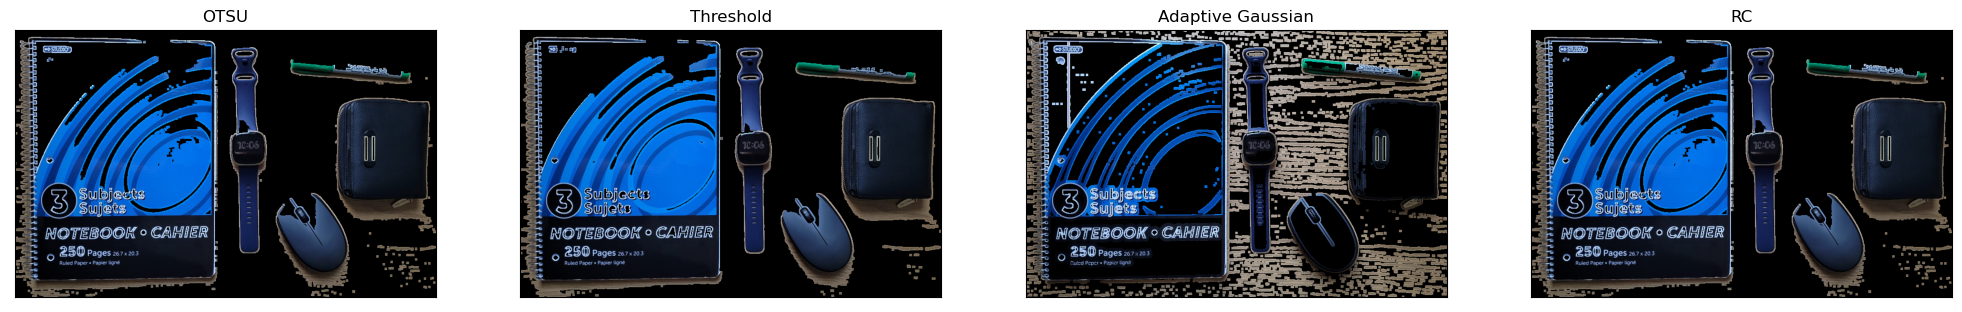

In [15]:
#plt.subplot(151),
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(25,25))

plt.subplot(141),plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB), cmap = plt.cm.gray)
plt.title('OTSU'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(cv2.cvtColor(foreground2, cv2.COLOR_BGR2RGB), cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(cv2.cvtColor(foreground3, cv2.COLOR_BGR2RGB), cmap = plt.cm.gray)
plt.title('Adaptive Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(cv2.cvtColor(foreground4, cv2.COLOR_BGR2RGB), cmap = plt.cm.gray)
plt.title('RC'), plt.xticks([]), plt.yticks([])
plt.show()

Manual Threshold has least noise in object extraction. Adaptive threshold has clear objects